In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
with open("../splitting_113k_uw.csv","r") as fd:
    lines=fd.readlines()

summary_uw=[]
summary_uw_header=[]
for line in lines:
    larr=line.strip().split(',')
    if len(larr)!=5:
        continue #bad line
    if larr[0][0]=='#':
        summary_uw_header=larr
    else:
        summary_uw.append(larr)

In [3]:
n_stripes=[[],[],[]]
times=[[],[],[]]
for el in summary_uw:
    s=int(el[0])
    for i in range(3):
        if el[i+2]!='':
            n_stripes[i].append(s)
            times[i].append(int(el[i+2]))    

In [4]:
ideal_times=[[],[],[]]
for i in range(3):
    max_s=n_stripes[i][-2]
    max_t=times[i][-2]
    for n in range(len(times[i])):
        ideal_times[i].append(max_t*n_stripes[i][n]/max_s)

In [5]:
#x = n_samples
#y = np.vstack([org_cpu,cpu,gpu_3s])

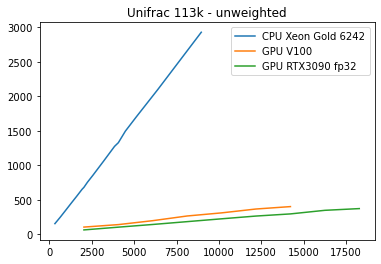

In [6]:
fig, ax = plt.subplots()
#ax.plot(n_samples[:len(org_cpu)], org_cpu,
#        n_samples[:len(cpu)], cpu,
#        n_samples[:len(gpu_3s)], gpu_3s)
ax.plot(n_stripes[0], times[0], label="CPU Xeon Gold 6242")
ax.plot(n_stripes[1], times[1], label="GPU V100")
ax.plot(n_stripes[2], times[2], label="GPU RTX3090 fp32")


plt.title("Unifrac 113k - unweighted")
ax.legend(loc='upper right')
plt.show()


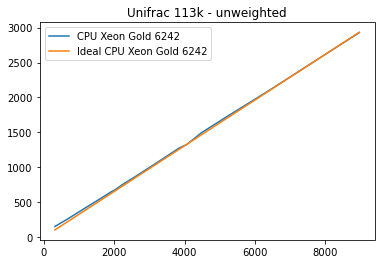

In [7]:
fig, ax = plt.subplots()
#ax.plot(n_samples[:len(org_cpu)], org_cpu,
#        n_samples[:len(cpu)], cpu,
#        n_samples[:len(gpu_3s)], gpu_3s)
ax.plot(n_stripes[0], times[0], label="CPU Xeon Gold 6242")
ax.plot(n_stripes[0], ideal_times[0], label="Ideal CPU Xeon Gold 6242")


plt.title("Unifrac 113k - unweighted")
ax.legend(loc='upper left')
plt.show()



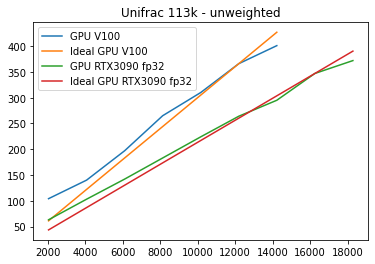

In [8]:
fig, ax = plt.subplots()
#ax.plot(n_samples[:len(org_cpu)], org_cpu,
#        n_samples[:len(cpu)], cpu,
#        n_samples[:len(gpu_3s)], gpu_3s)
ax.plot(n_stripes[1], times[1], label="GPU V100")
ax.plot(n_stripes[1], ideal_times[1], label="Ideal GPU V100")
ax.plot(n_stripes[2], times[2], label="GPU RTX3090 fp32")
ax.plot(n_stripes[2], ideal_times[2], label="Ideal GPU RTX3090 fp32")


plt.title("Unifrac 113k - unweighted")
ax.legend(loc='upper left')
plt.show()

